<a href="https://colab.research.google.com/github/Sangee-28/House_price_prediction_machinelearnig/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing required modules
from google.colab import files
 
#Upload files into google colab
uploaded = files.upload()

Saving train-chennai-sale.csv to train-chennai-sale (3).csv


In [3]:
#importing required modules
import pandas as pd
import io
 
# Converting the csv files into pandas dataframe
house_df = pd.read_csv(io.BytesIO(uploaded['train-chennai-sale.csv']))

**DATA CLEANING**

In [4]:
#Priting the number of rows and columns in the dataframe
print(house_df.shape)

# printing the first five rows in the dataframe
print(house_df.head(5))

(7109, 22)
   PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALE

In [5]:
#Checking for null values in the dataset
print(house_df.isnull().sum())

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64


In [6]:
#deleting all the rows with null values

# dropping the empty rows in QS_OVERALL column
house_df.dropna(subset = ["QS_OVERALL"], inplace=True)
# dropping the empty rows in N_BEDROOM column
house_df.dropna(subset = ["N_BEDROOM"], inplace=True)
# dropping the empty rows in N_BATHROOM column
house_df.dropna(subset = ["N_BATHROOM"], inplace=True)


In [7]:
#Checking for null values again
print(house_df.isnull().sum())

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64


In [8]:
#droping the print id column because it is necessary

house_df.drop(columns=['PRT_ID'], axis=1, inplace=True)

In [9]:
#checking whether the 'PRT_ID' column has been removed

house_df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [10]:
#checking the datatypes of all the columns

house_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

In [11]:
#Checking for spelling mistakes for object columns
 
#column AREA

house_df['AREA'].value_counts()



area=[]
for i in house_df["AREA"].values:
  if i=='karapakam':
   area.append("Karapakkam")
  if i=="Karapakam":
   area.append("Karapakkam")
  elif i=="Chrompet":
   area.append("Chrompt")
  elif i =="Chrmpet":
   area.append("Chrompt")
  elif i=="Chormpet":
   area.append("Chrompt")
  elif i=="Ann Nagar":
   area.append("Anna Nagar")
  elif i=="Ana Nagar":
    area.append("Anna Nagar")
  elif i=="Adyr":
    area.append("Adyar")
  elif i=="Velchery":
    area.append("Velachery")
  elif i=="KKNagar":
    area.append("KK Nagar")
  elif i=="TNagar":
    area.append("T Nagar")
    continue
  else:
    area.append(i)

house_df["area"] =area

In [12]:
house_df['area'].value_counts()


Chrompt       1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: area, dtype: int64

In [13]:
#column 'PARK_FACIL'

house_df['PARK_FACIL'].value_counts()

parking=[]

for i in house_df['PARK_FACIL'].values:
  if i=="Noo":
   parking.append("No")
  else:
   parking.append(i)
  

house_df["parking"] =parking

In [14]:
house_df['parking'].value_counts()


Yes    3557
No     3499
Name: parking, dtype: int64

In [15]:
#column 'BUILDTYPE'

house_df['BUILDTYPE'].value_counts()


buildtype=[]

for i in house_df['BUILDTYPE'].values:
  if i=="Other":
    buildtype.append("Others")
  elif i=="No":
     buildtype.append("Others")
  elif i=="Commercial":
     buildtype.append("Comercial")
     continue
  else:
    buildtype.append(i)
  

house_df["buildtype"] =buildtype




In [16]:
house_df['buildtype'].value_counts()


House        2433
Others       2312
Comercial    2311
Name: buildtype, dtype: int64

In [17]:
#SALE_CONDITON

house_df['SALE_COND'].value_counts()


sale_cond =[]

for i in house_df['SALE_COND'].values:
 if i=="Partiall":
   sale_cond.append("Partial")
 elif i=="PartiaLl":
   sale_cond.append("Partial")
 elif i=="Ab Normal":
   sale_cond.append("AbNormal")
 elif i=="Adj Land":
   sale_cond.append("AdjLand")
   continue
 else:
   sale_cond.append(i)
 
  
house_df['sale_cond'] =sale_cond


In [18]:
house_df['sale_cond'].value_counts()

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: sale_cond, dtype: int64

In [19]:
#STREET

house_df['STREET'].value_counts()


street=[]

for i in house_df['STREET'].values:
  if i =='NoAccess':
    street.append("No Access")
  elif i=='Pavd':
   street.append("Paved")
   continue
  else:
    street.append(i)

house_df['street']=street

house_df['street'].value_counts()

Paved        2554
Gravel       2502
No Access    2000
Name: street, dtype: int64

In [20]:
from numpy import ERR_LOG
print(house_df['UTILITY_AVAIL'].value_counts())

utility=[]

for i in house_df['UTILITY_AVAIL'].values:
  if (i =="All Pub") or (i=="AllPub"):
   utility.append("AllPub")
  elif i=="ELO":
   utility.append("ELO")
  else:
    utility.append("NoSewr")
  


house_df['utility'] =utility



AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64


In [21]:
house_df['utility'].value_counts()




NoSewr    3672
AllPub    1875
ELO       1509
Name: utility, dtype: int64

In [22]:
# dropping the unwanted columns with spelling mistakes
house_df.drop(columns=['AREA',"PARK_FACIL","BUILDTYPE","SALE_COND","STREET","UTILITY_AVAIL"], axis=1, inplace=True)
#checking whether it has been removed
house_df.columns

Index(['INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'DATE_BUILD', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'area',
       'parking', 'buildtype', 'sale_cond', 'street', 'utility'],
      dtype='object')

In [23]:
#MZZONE

house_df['MZZONE'].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [24]:
# removing unnecessary values from the column salesprice

#Printing the unique values of salesprice

house_df['SALES_PRICE'].unique()

house_df = house_df[(house_df['SALES_PRICE'] != "Chrompet") & (house_df['SALES_PRICE'] != "T Nagar") & (house_df['SALES_PRICE'] != "Adyar") &(house_df["SALES_PRICE"]!="Velachery") & (house_df["SALES_PRICE"]!="KK Nagar") & (house_df["SALES_PRICE"]!="Anna Nagar") & (house_df['SALES_PRICE'] != "Karapakkam")] 

**EDA**

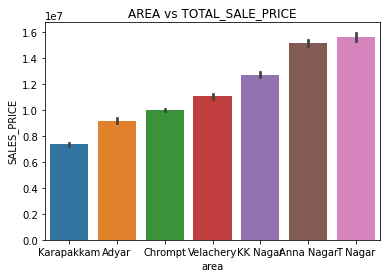

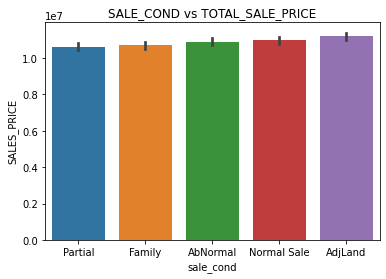

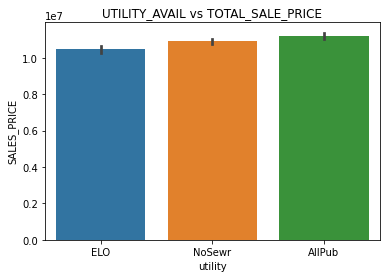

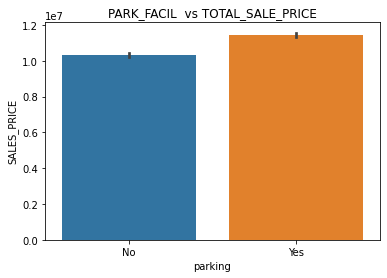

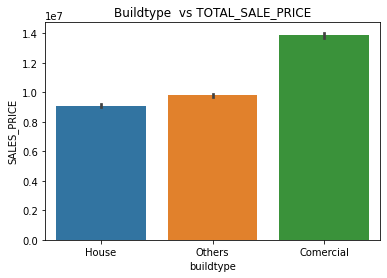

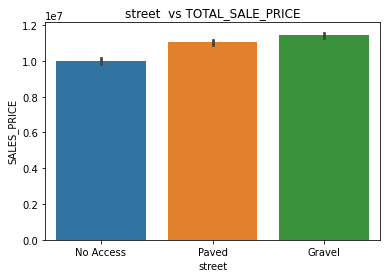

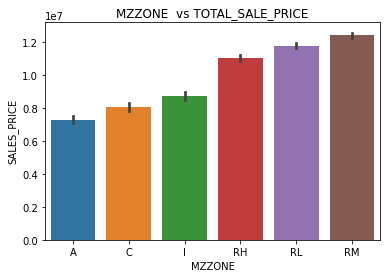

In [25]:
#Exploratory analysis to find the most important features


#importing the required modules

import seaborn as sns
import matplotlib.pyplot as plt



#AREA
sns.barplot(x=house_df.area,y=house_df.SALES_PRICE,order=house_df.groupby('area')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['area'])
plt.title('AREA vs TOTAL_SALE_PRICE')
plt.show()

#SALE_COND
sns.barplot(x=house_df.sale_cond,y=house_df.SALES_PRICE,order=house_df.groupby('sale_cond')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['sale_cond'])
plt.title('SALE_COND vs TOTAL_SALE_PRICE')
plt.show()

#UTILITY AVAILABLE
sns.barplot(x=house_df.utility,y=house_df.SALES_PRICE,order=house_df.groupby('utility')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['utility'])
plt.title('UTILITY_AVAIL vs TOTAL_SALE_PRICE')
plt.show()

#PARKING FACILITY
sns.barplot(x=house_df.parking ,y=house_df.SALES_PRICE,order=house_df.groupby('parking')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['parking'])
plt.title('PARK_FACIL  vs TOTAL_SALE_PRICE')
plt.show()


#Buildtype
sns.barplot(x=house_df.buildtype ,y=house_df.SALES_PRICE,order=house_df.groupby('buildtype')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['buildtype'])
plt.title('Buildtype  vs TOTAL_SALE_PRICE')
plt.show()

#STREET
sns.barplot(x=house_df.street ,y=house_df.SALES_PRICE,order=house_df.groupby('street')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['street'])
plt.title('street  vs TOTAL_SALE_PRICE')
plt.show()


#mzzone
sns.barplot(x=house_df.MZZONE ,y=house_df.SALES_PRICE,order=house_df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE  vs TOTAL_SALE_PRICE')
plt.show()




Buildtype feature can be one hot encoded
Other features area , utility, parking ,street , MZZONE ,sale_condition can be label encoded beacuse they are linearly growing

In [26]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       7056 non-null   int64  
 1   DATE_SALE      7056 non-null   object 
 2   DIST_MAINROAD  7056 non-null   int64  
 3   N_BEDROOM      7056 non-null   float64
 4   N_BATHROOM     7056 non-null   float64
 5   N_ROOM         7056 non-null   int64  
 6   DATE_BUILD     7056 non-null   object 
 7   MZZONE         7056 non-null   object 
 8   QS_ROOMS       7056 non-null   float64
 9   QS_BATHROOM    7056 non-null   float64
 10  QS_BEDROOM     7056 non-null   float64
 11  QS_OVERALL     7056 non-null   float64
 12  REG_FEE        7056 non-null   int64  
 13  COMMIS         7056 non-null   int64  
 14  SALES_PRICE    7056 non-null   int64  
 15  area           7056 non-null   object 
 16  parking        7056 non-null   object 
 17  buildtype      7056 non-null   object 
 18  sale_con

Inference : The cost of home depends on the area where the house is located. Therefore label encoding is suitable

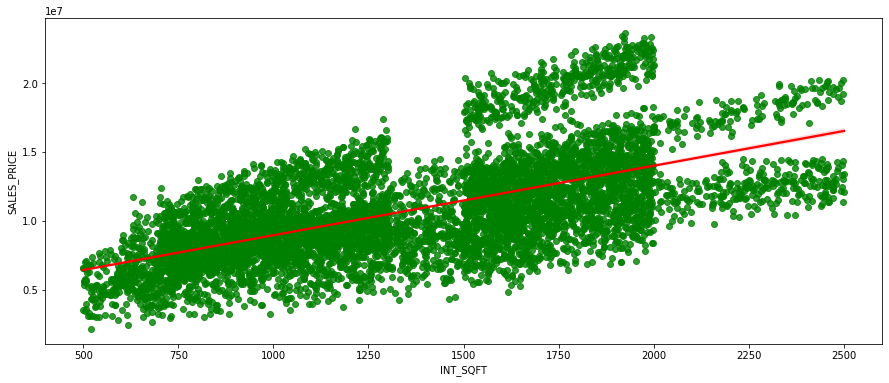

In [27]:
# INT SQFT

#finding correlation 
plt.figure(figsize=(15, 6))
sns.regplot(x='INT_SQFT', y='SALES_PRICE', data=house_df, scatter_kws={'color':"green"} ,line_kws={'color':"red"})
plt.show()

Inference: INT_SQFT and cost of the house has positive linear  correlation. Thus the feature is important

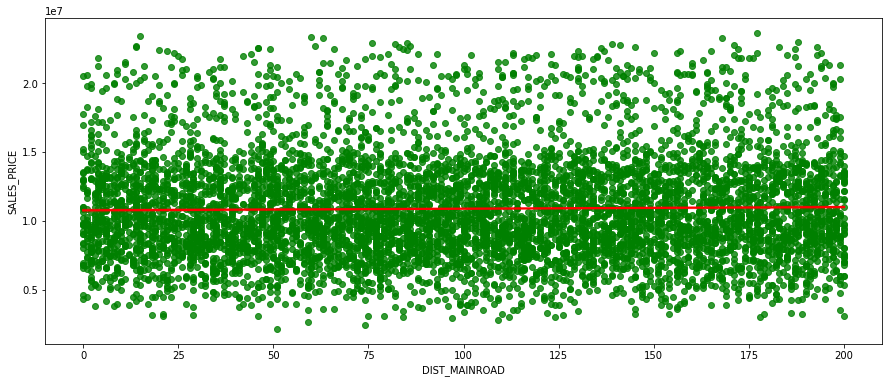

In [28]:
#DIST_MAINROAD feature


#finding correlation 
plt.figure(figsize=(15, 6))
sns.regplot(x='DIST_MAINROAD', y='SALES_PRICE', data=house_df, scatter_kws={'color':"green"} ,line_kws={'color':"red"})
plt.show()

Inference: There is no correlation between distance from mainroad and cost of the house , so dropping the feature

In [29]:
# dropping the "DIST_MAINROAD" column
house_df.drop(columns=['DIST_MAINROAD'], axis=1, inplace=True)
#checking whether it has been removed
house_df.columns

Index(['INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'DATE_BUILD', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'area', 'parking',
       'buildtype', 'sale_cond', 'street', 'utility'],
      dtype='object')

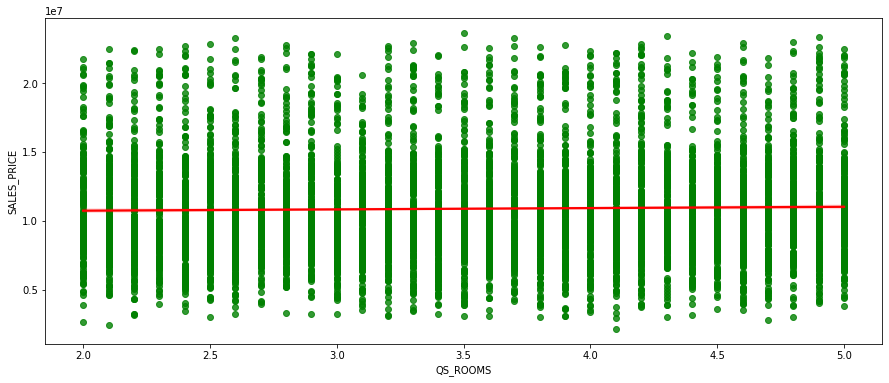

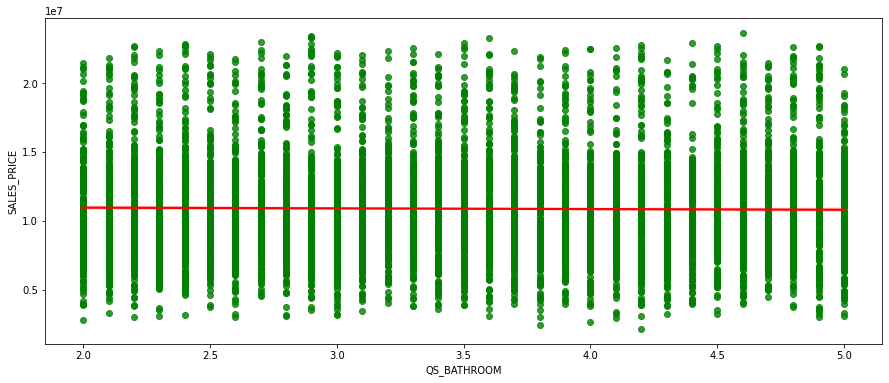

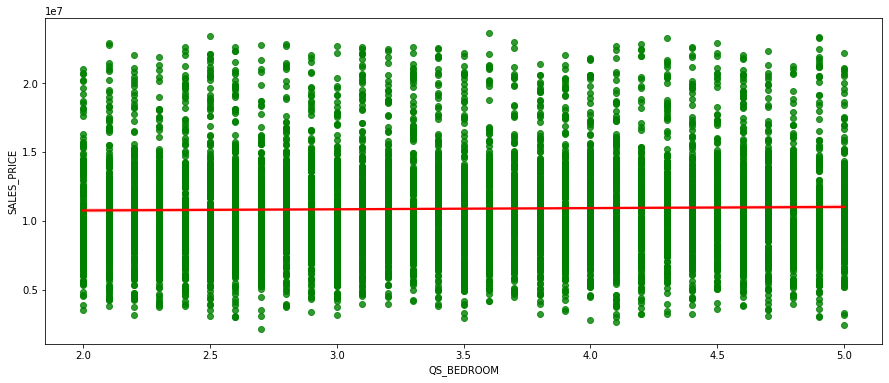

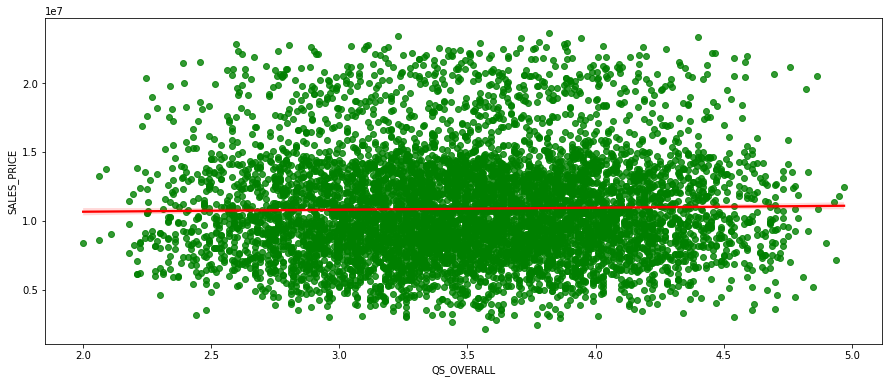

In [30]:
#QS_ROOMS ,QS_BATHROOMS ,QS_BEDROOM ,QS_OVERALL



#finding correlation 
plt.figure(figsize=(15, 6))
sns.regplot(x='QS_ROOMS', y='SALES_PRICE', data=house_df, scatter_kws={'color':"green"} ,line_kws={'color':"red"})
plt.show()

#finding correlation 
plt.figure(figsize=(15, 6))
sns.regplot(x='QS_BATHROOM', y='SALES_PRICE', data=house_df, scatter_kws={'color':"green"} ,line_kws={'color':"red"})
plt.show()

#finding correlation 
plt.figure(figsize=(15, 6))
sns.regplot(x='QS_BEDROOM', y='SALES_PRICE', data=house_df, scatter_kws={'color':"green"} ,line_kws={'color':"red"})
plt.show()

#finding correlation 
plt.figure(figsize=(15, 6))
sns.regplot(x='QS_OVERALL', y='SALES_PRICE', data=house_df, scatter_kws={'color':"green"} ,line_kws={'color':"red"})
plt.show()



In [31]:
# dropping all these four features because they do not have any corelation with the target
house_df.drop(columns=['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'], axis=1, inplace=True)

In [32]:
#checking whether the columns have been removed
house_df.columns

Index(['INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'DATE_BUILD', 'MZZONE', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'area',
       'parking', 'buildtype', 'sale_cond', 'street', 'utility'],
      dtype='object')

In [33]:
#Removing REG_FEE and COMMINS columns because they will only be calulated at the time of sale and do not have any importance towards feature
house_df.drop(columns=['REG_FEE','COMMIS'], axis=1, inplace=True)


In [34]:
#checking whether the columns have been removed
house_df.columns

Index(['INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'DATE_BUILD', 'MZZONE', 'SALES_PRICE', 'area', 'parking', 'buildtype',
       'sale_cond', 'street', 'utility'],
      dtype='object')

**ENCODING**

In [35]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INT_SQFT     7056 non-null   int64  
 1   DATE_SALE    7056 non-null   object 
 2   N_BEDROOM    7056 non-null   float64
 3   N_BATHROOM   7056 non-null   float64
 4   N_ROOM       7056 non-null   int64  
 5   DATE_BUILD   7056 non-null   object 
 6   MZZONE       7056 non-null   object 
 7   SALES_PRICE  7056 non-null   int64  
 8   area         7056 non-null   object 
 9   parking      7056 non-null   object 
 10  buildtype    7056 non-null   object 
 11  sale_cond    7056 non-null   object 
 12  street       7056 non-null   object 
 13  utility      7056 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB


In [36]:

#Label Encoding area column

area_dict = {"Karapakkam": 1, "Adyar": 2, "Chrompt": 3, "Velachery": 4, "KK Nagar": 5, "Anna Nagar": 6, "T Nagar":7}


def num_map(series):
 return series.map(area_dict)
house_df[['area']]=house_df[['area']].apply(num_map , axis=1)



#lable encoding utility column

utility_dict = {"ELO": 1, "NoSewr": 2,"AllPub":3}


def num_map(series):
 return series.map(utility_dict)

house_df[['utility']]=house_df[['utility']].apply(num_map , axis=1)


#label encoding MZZONE

mzzone_dict = {"A": 1, "C": 2, "I": 3, "RH": 4, "RL": 5, "RM": 6}


def num_map(series):
 return series.map(mzzone_dict)

house_df[['MZZONE']]=house_df[['MZZONE']].apply(num_map , axis=1)


# label encoding parking column
from sklearn import preprocessing   
my_label = preprocessing.LabelEncoder()   
house_df['parking'] =my_label.fit_transform(house_df[ 'parking' ])   


#label encoding sale_cond column
salecon_dict = {"Partial": 1, "Family": 2, "AbNormal": 3, "Normal Sale": 4, "AdjLand": 5}


def num_map(series):
 return series.map(salecon_dict)

house_df[['sale_cond']]=house_df[['sale_cond']].apply(num_map , axis=1)

#label encoding street column
street_dict = {"No Access": 1, "Gravel": 2, "Paved": 3}


def num_map(series):
 return series.map(street_dict)

house_df[['street']]=house_df[['street']].apply(num_map , axis=1)










In [37]:
house_df

,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,MZZONE,SALES_PRICE,area,parking,buildtype,sale_cond,street,utility
0,1004,04-05-2011,1.0,1.0,3,15-05-1967,1,7600000,1,1,Comercial,3,3,3
1,1986,19-12-2006,2.0,1.0,5,22-12-1995,4,21717770,6,0,Comercial,3,2,3
2,909,04-02-2012,1.0,1.0,3,09-02-1992,5,13159200,2,1,Comercial,3,2,1
3,1855,13-03-2010,3.0,2.0,5,18-03-1988,3,9630290,4,0,Others,2,3,2
4,1226,05-10-2009,1.0,1.0,3,13-10-1979,2,7406250,1,1,Others,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,03-01-2011,1.0,1.0,2,15-01-1962,6,5353000,1,0,Others,5,1,1
7105,1897,08-04-2004,3.0,2.0,5,11-04-1995,4,10818480,4,1,Others,2,1,2
7106,1614,25-08-2006,2.0,1.0,4,01-09-1978,3,8351410,4,0,House,4,2,2
7107,787,03-08-2009,1.0,1.0,2,11-08-1977,5,8507000,1,1,Comercial,1,3,1


In [38]:
#one hot encoding buildtype feature
build_type_dummies = pd.get_dummies(house_df['buildtype'], dtype = int)
house_df = pd.concat([house_df, build_type_dummies], axis = 1)
house_df.drop(columns=['buildtype'], axis=1, inplace=True)




In [39]:
#date time module
dt_series = pd.Series(data = [item.split("-")[2] + "-" + item.split("-")[1] + "-" + item.split("-")[0] for item in house_df['DATE_SALE']], index=house_df.index) 


dt_series = pd.to_datetime(house_df['DATE_SALE'])

print(dt_series)
sale_year = dt_series.dt.year
house_df['SALE_YEAR'] = sale_year
dt_series1 = pd.Series(data = [item.split("-")[2] + "-" + item.split("-")[1] + "-" + item.split("-")[0] for item in house_df['DATE_BUILD']], index=house_df.index) 


dt_series1 = pd.to_datetime(house_df['DATE_BUILD'])

print(dt_series1)
build_year = dt_series1.dt.year
house_df['BUILD_YEAR'] = build_year
house_df.drop(columns=['DATE_BUILD','DATE_SALE'], axis=1, inplace=True)

0      2011-04-05
1      2006-12-19
2      2012-04-02
3      2010-03-13
4      2009-05-10
          ...    
7104   2011-03-01
7105   2004-08-04
7106   2006-08-25
7107   2009-03-08
7108   2005-07-13
Name: DATE_SALE, Length: 7056, dtype: datetime64[ns]
0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7056, dtype: datetime64[ns]


In [40]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INT_SQFT     7056 non-null   int64  
 1   N_BEDROOM    7056 non-null   float64
 2   N_BATHROOM   7056 non-null   float64
 3   N_ROOM       7056 non-null   int64  
 4   MZZONE       7056 non-null   int64  
 5   SALES_PRICE  7056 non-null   int64  
 6   area         7056 non-null   int64  
 7   parking      7056 non-null   int64  
 8   sale_cond    7056 non-null   int64  
 9   street       7056 non-null   int64  
 10  utility      7056 non-null   int64  
 11  Comercial    7056 non-null   int64  
 12  House        7056 non-null   int64  
 13  Others       7056 non-null   int64  
 14  SALE_YEAR    7056 non-null   int64  
 15  BUILD_YEAR   7056 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 1.2 MB


In [41]:
house_df.isnull().sum()

INT_SQFT       0
N_BEDROOM      0
N_BATHROOM     0
N_ROOM         0
MZZONE         0
SALES_PRICE    0
area           0
parking        0
sale_cond      0
street         0
utility        0
Comercial      0
House          0
Others         0
SALE_YEAR      0
BUILD_YEAR     0
dtype: int64

In [42]:
#spliting target and feature , training and testing

#Importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#Creating a list of feature variables

features = list(house_df.columns.values[0:17])
features.remove('SALES_PRICE')
features


X = house_df[features]
y = house_df['SALES_PRICE']
# Splitting the DataFrame into the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state = 42) # Test set will have 33% of the values.
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)



In [43]:
#Implementing Linear Regression Model
# Build linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train_reshaped)

# Print the value of the intercept i.e. beta-sub-0.
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") 

# Print the names of the features along with the values of their corresponding␣coefficients.
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_[0])):
 print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") 


Constant       21067683.388934
INT_SQFT        1434.568210
N_BEDROOM       -1490273.708302
N_BATHROOM      241455.348404
N_ROOM          1677993.945740
MZZONE          599529.022076
area            584370.480188
parking         1055131.906995
sale_cond       145422.226207
street          188819.867687
utility         88132.468116
Comercial       2840969.429830
House           -1748914.999182
Others          -1092054.430648
SALE_YEAR       -30180.515775
BUILD_YEAR      19273.387949


In [44]:
 #Evaluate the linear regression model using the 'r2_score','mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn'␣module.


#Importing the required modules
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

#Prediction is done
y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped,y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped,y_train_pred):.3f}")


print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped,y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")



Train Set
--------------------------------------------------
R-squared: 0.915
Mean Squared Error: 1204528383635.208
Root Mean Squared Error: 1097510.084
Mean Absolute Error: 852064.428


Test Set
--------------------------------------------------
R-squared: 0.914
Mean Squared Error: 1241444713903.955
Root Mean Squared Error: 1114201.379
Mean Absolute Error: 866638.973


Linear Regression is working fine for this algorithm as you could see the R-squared value is 0.914

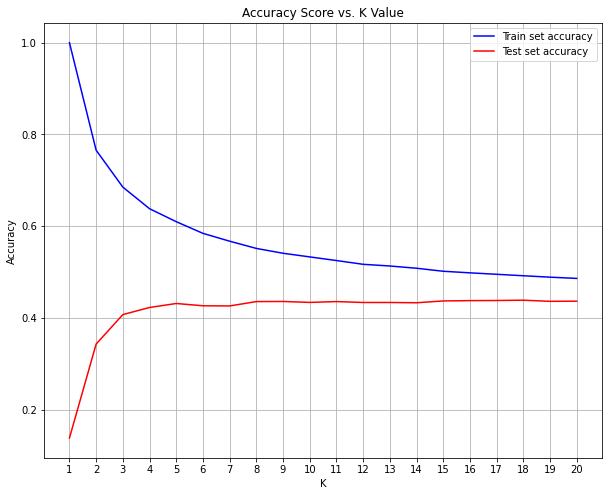

In [45]:
# Plot accuracy scores of train and test sets for 1 to 20 neighbours.
# Import KNeighborsRegressor from sklearn
from sklearn.neighbors import KNeighborsRegressor

# Make lists to store train and test accuracy scores
acc_train = []
acc_test= []

# Loop over for a range of 20 to get the accuracy scores
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    acc_train.append(knn.score(X_train, y_train))
    acc_test.append(knn.score(X_test, y_test))
    
# plot Train and Test accuracy scores
plt.figure(figsize = (10, 8))
plt.grid()
plt.xticks(range(1, 21, 1))
plt.plot(range(1, 21), acc_train, color= 'blue', label = "Train set accuracy")
plt.plot(range(1, 21), acc_test, color= 'red', label = "Test set accuracy")      
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [46]:
#finding cross validation score
from sklearn.model_selection import cross_val_score

for k in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,40,80]:
  clf = KNeighborsRegressor(n_neighbors=k)
  clf.fit(X,y)
  print("K value : ", k, " train score : ", clf.score(X,y) , " test score : ", cross_val_score(clf,X,y,cv = 10, scoring = 'accuracy').mean())

K value :  1  train score :  1.0  test score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  2  train score :  0.7803785313817442  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  3  train score :  0.7091270448619329  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  4  train score :  0.6664634114877656  test score :  nan
K value :  5  train score :  0.6329296793427118  test score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  6  train score :  0.6127379982959784  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  7  train score :  0.5926686934620335  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  8  train score :  0.5780243832815184  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  9  train score :  0.5638858970696963  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  10  train score :  0.5515161192825895  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  11  train score :  0.5408838607490438  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  12  train score :  0.5337245204308863  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  13  train score :  0.5292922844469954  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  14  train score :  0.5238484821786327  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  15  train score :  0.517889584496177  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  16  train score :  0.5121929415493414  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  17  train score :  0.5088082834668008  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  18  train score :  0.5046924675247493  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  19  train score :  0.5010446615228601  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  20  train score :  0.49749720319645285  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  40  train score :  0.46261727355710014  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

K value :  80  train score :  0.43720744563583913  test score :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

You may observe that with an increase in the number of neighbours, the accuracy score of train set decreases whereas test set accuracy score increases. As test set accuracy score is a better estimate than train set accuracy for unseen data, we can say that 6 is an optimal value for  k .

Let us now deploy the kNN regressor model for  k=5

In [47]:
#Train kNN regressor model for 'k = 5'

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

# Perform prediction using 'predict()' function.
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn.score(X_train, y_train))
print("Test set accuracy:", knn.score(X_test, y_test))

Train set accuracy: 0.6096824933436276
Test set accuracy: 0.43127926743484046
